# Data Exploration and Manipulaton

## In this notebook we will extensively explore the dataset using mulpule statistical and graphical methods. 
### We will be using mean, median, mode, standard deviation as statistical methods and boxplot , histogram and scatter plots as graphical methods

### Some Data Manipulations like Outlier treatment, Categorical data tranformation, missing value treatment will be done.

#### [Note: The raw data is being explored here. After eploration , a new CSV file will be generated which is used in the model training and evaluation phase]

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing impor`t StandardScaler
%matplotlib inline

In [129]:
data = pd.read_csv("churn_prediction.csv")

# Exploring data

In [130]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [131]:
data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


In [132]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [133]:
data.isnull().sum()





customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [134]:
data[data['city'].isnull()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
41,44,282,90,NaN,NaN,self_employed,NaN,3,2939,61.0,...,7870.87,7265.10,4324.97,0.23,0.23,0.23,0.23,7870.87,7870.87,0
121,127,2919,66,Male,1.0,retired,NaN,1,16,0.0,...,48883.19,57415.13,16768.78,382.80,5910.64,31358.79,21735.89,27160.15,55694.76,1
131,139,3425,43,Male,2.0,salaried,NaN,3,2245,32.0,...,2189.98,1930.66,4036.99,0.13,8742.99,1105.96,3900.13,1872.19,1716.76,0
234,256,1490,90,Male,0.0,self_employed,NaN,2,2375,21.0,...,751.24,3547.03,1577.53,11748.99,693.26,308.81,1523.54,9824.97,180.84,0
292,315,883,6,Female,0.0,student,NaN,2,32,NaN,...,3056.21,2641.46,1490.73,0.40,0.40,0.40,0.40,3127.64,3056.21,1
306,330,3148,29,Male,0.0,self_employed,NaN,2,37,14.0,...,6040.09,7128.58,7278.22,948.37,826.11,212.95,3096.76,4854.50,7558.51,0
335,360,1921,37,Male,0.0,self_employed,NaN,2,780,3.0,...,9627.31,4343.18,1663.77,3290.30,8008.71,6951.01,1005.61,5555.56,5860.12,1
350,376,353,32,Female,0.0,self_employed,NaN,3,1643,18.0,...,1604.24,1461.62,1498.16,2285.89,0.17,3571.60,0.17,1176.37,1604.24,1
370,397,2169,70,Female,0.0,self_employed,NaN,2,3192,165.0,...,1660.27,1822.80,3236.69,0.30,0.30,0.30,256.50,1660.27,1891.68,0


In [135]:
data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [136]:
for col in data:
    print('\n\n',col,'\n')
    print(data[col].value_counts())



 customer_id 

2047     1
3403     1
15661    1
9518     1
21824    1
17730    1
19779    1
30020    1
25926    1
27975    1
5448     1
7497     1
1354     1
13644    1
3371     1
15693    1
9550     1
11599    1
21856    1
23905    1
17762    1
19811    1
30052    1
25958    1
28007    1
5480     1
13612    1
1322     1
1258     1
1290     1
        ..
21215    1
10992    1
2740     1
12979    1
15026    1
8881     1
12915    1
2676     1
629      1
6774     1
4727     1
27256    1
25209    1
29307    1
23166    1
21119    1
10896    1
14994    1
2708     1
661      1
6806     1
4759     1
27288    1
25241    1
29339    1
17053    1
23198    1
21151    1
10928    1
2049     1
Name: customer_id, Length: 28382, dtype: int64


 vintage 

1432    25
1997    23
403     21
1718    20
1400    20
439     19
984     19
626     19
287     19
1169    19
1394    19
1460    18
2665    18
1342    18
2412    18
625     18
1984    18
1036    18
1395    18
2258    18
290     18
1557    17
1766    17

In [137]:
data.drop_duplicates()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


# Boxplot Analysis

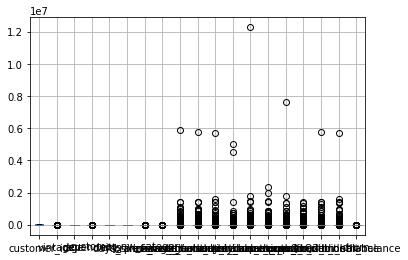

In [138]:
data.boxplot()

In [139]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

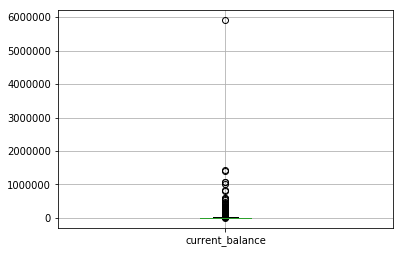

In [140]:
data.boxplot('current_balance')
#

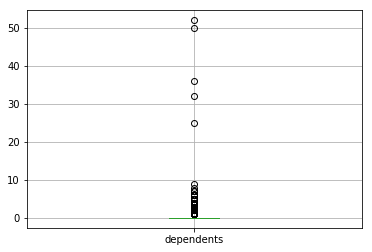

In [141]:
data.boxplot('dependents')

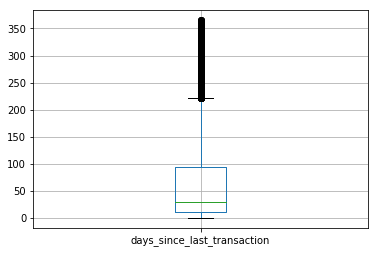

In [142]:
data.boxplot('days_since_last_transaction')

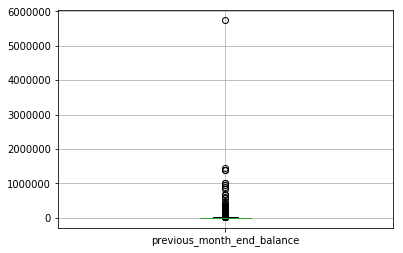

In [143]:
data.boxplot('previous_month_end_balance')
#

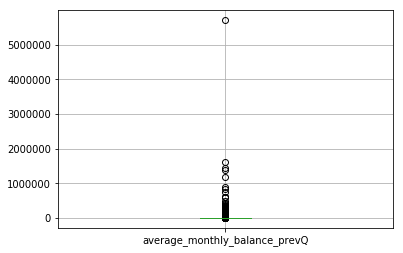

In [144]:
data.boxplot('average_monthly_balance_prevQ')
#

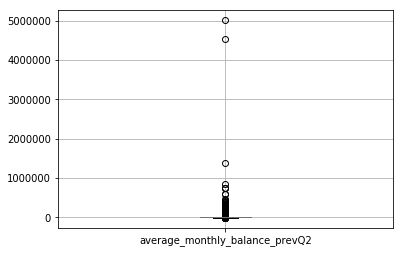

In [145]:
data.boxplot('average_monthly_balance_prevQ2')
#

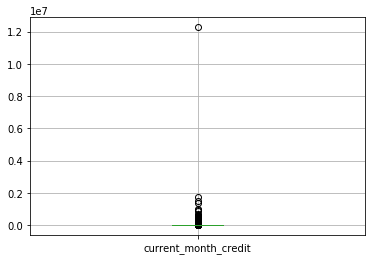

In [146]:
data.boxplot('current_month_credit')
##

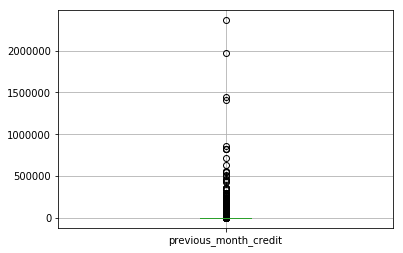

In [147]:
data.boxplot('previous_month_credit')
#

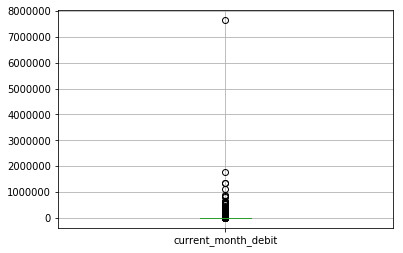

In [148]:
data.boxplot('current_month_debit')
##

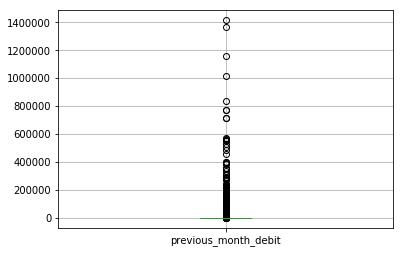

In [149]:
data.boxplot('previous_month_debit')
##

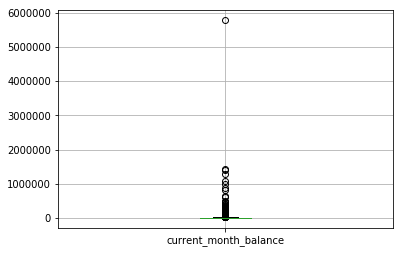

In [150]:
data.boxplot('current_month_balance')
##

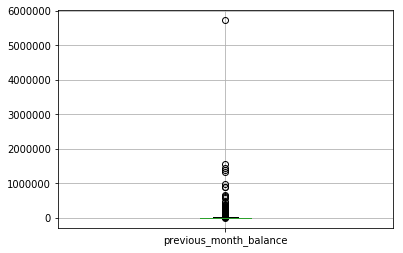

In [151]:
data.boxplot('previous_month_balance')
##

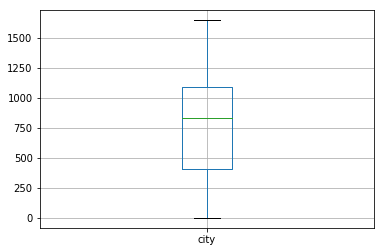

In [152]:
data.boxplot('city')

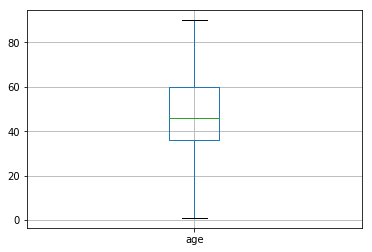

In [153]:
data.boxplot('age')

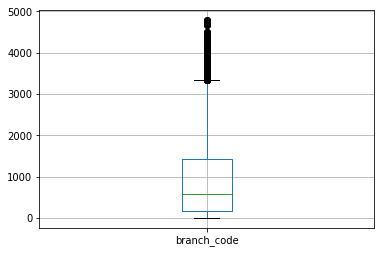

In [154]:
data.boxplot('branch_code')

# Finding out Outliers

In [155]:
data[data['current_month_debit']<5000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0
10,12,661,68,Male,0.0,retired,409.0,3,709,5.0,...,1571.47,1722.60,747.66,443.40,0.54,0.54,208.79,1606.54,1800.15,0
13,15,5703,50,Male,0.0,salaried,409.0,1,88,303.0,...,3526.01,2831.89,8075.81,0.61,0.61,1748.08,2529.75,2985.16,1536.98,0


In [156]:
data[data['average_monthly_balance_prevQ2']>1000000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
2031,2174,185,90,Male,NaN,NaN,499.0,3,647,0.0,...,2731.71,249546.45,4526049.01,35205.37,80899.25,37177.01,209375.89,8932.18,40335.19,1
9908,10575,1670,90,NaN,NaN,self_employed,243.0,2,2542,18.0,...,5740438.63,5700289.57,5010170.10,5232.34,1452.87,17327.27,17248.30,5778184.77,5720144.50,0
23247,24807,1732,90,Male,0.0,self_employed,1294.0,2,150,NaN,...,1398486.42,1398486.42,1389626.93,0.31,0.31,0.31,0.31,1398486.42,1398486.42,0


In [157]:
data[data['average_monthly_balance_prevQ']>1000000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
9908,10575,1670,90,NaN,NaN,self_employed,243.0,2,2542,18.0,...,5740438.63,5700289.57,5010170.10,5232.34,1452.87,17327.27,17248.30,5778184.77,5720144.50,0
12712,13575,2418,73,Female,0.0,self_employed,834.0,2,469,0.0,...,1001088.10,1192704.04,251523.86,57143.49,102.81,215561.70,568052.57,1001725.71,1326486.64,0
23211,24764,2560,90,NaN,0.0,self_employed,751.0,2,138,108.0,...,1396836.81,1608344.15,757872.97,0.56,0.56,240137.37,95975.76,1284357.61,1572832.93,1
23247,24807,1732,90,Male,0.0,self_employed,1294.0,2,150,NaN,...,1398486.42,1398486.42,1389626.93,0.31,0.31,0.31,0.31,1398486.42,1398486.42,0
27856,29735,194,90,Male,0.0,NaN,904.0,1,296,213.0,...,1435872.80,1435872.80,413107.52,0.24,0.24,0.24,0.24,1435872.80,1435872.80,0


In [158]:
data[data['current_month_credit']>500000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
1817,1948,254,61,Male,0.0,self_employed,1020.0,2,1105,3.0,...,9312.81,51134.99,38098.22,858432.89,819764.11,862469.01,837476.76,13362.95,21893.22,1
2078,2223,2260,90,NaN,0.0,self_employed,224.0,1,1687,0.0,...,69194.28,57750.62,105927.68,634428.70,566428.70,650000.13,557142.99,50278.03,69148.20,0
2503,2673,6059,54,Male,2.0,self_employed,905.0,1,34,9.0,...,1264.96,34657.00,8111.60,699047.06,825969.46,378186.26,508168.04,38594.53,55638.95,1
5688,6060,1790,45,Female,0.0,self_employed,1020.0,1,291,0.0,...,8822.30,128176.81,89532.45,577643.68,20000.41,2919.16,1725.05,359822.63,9178.55,0
6120,6518,1103,90,NaN,NaN,self_employed,409.0,2,588,11.0,...,243626.01,490044.03,335042.86,995241.38,216939.28,1110922.50,1012877.80,392962.66,618549.76,0
7787,8295,2895,51,Male,0.0,self_employed,1232.0,1,7,4.0,...,206014.78,284779.02,323182.68,1476976.45,2361808.29,824573.99,1159958.76,263497.14,383897.54,0
8023,8550,196,90,NaN,NaN,self_employed,623.0,1,42,4.0,...,314682.02,92596.95,481.78,915151.36,0.20,1335714.49,100000.20,124326.08,153068.88,0
8471,9025,1582,32,Male,0.0,salaried,146.0,2,76,4.0,...,884.96,2662.49,4426.52,590000.03,36.95,614285.74,4345.66,3564.10,1766.26,0
12218,13047,3882,51,Male,0.0,self_employed,1020.0,1,60,7.0,...,356602.22,170440.29,113738.06,1383300.84,1971436.45,242838.61,8394.94,131732.17,300160.62,0
13012,13895,2903,55,Female,0.0,self_employed,1534.0,2,63,11.0,...,22919.79,22416.17,22092.02,1764285.97,71428.83,1764285.97,71428.83,23278.80,22617.63,0


In [159]:
data[data['previous_month_credit']>1000000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
5637,6003,1690,36,Male,2.0,salaried,1096.0,1,1719,0.0,...,2266.61,6033.10,9665.78,10181.39,1413436.47,11514.33,1414168.06,2152.97,12023.31,0
7787,8295,2895,51,Male,0.0,self_employed,1232.0,1,7,4.0,...,206014.78,284779.02,323182.68,1476976.45,2361808.29,824573.99,1159958.76,263497.14,383897.54,0
9493,10131,2867,59,Male,2.0,self_employed,1020.0,1,410,0.0,...,34005.37,12074.81,7655.22,486187.64,1447086.21,457836.21,1363197.64,13812.27,20309.54,0
12218,13047,3882,51,Male,0.0,self_employed,1020.0,1,60,7.0,...,356602.22,170440.29,113738.06,1383300.84,1971436.45,242838.61,8394.94,131732.17,300160.62,0


In [160]:
data[data['previous_month_debit']>600000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
1817,1948,254,61,Male,0.0,self_employed,1020.0,2,1105,3.0,...,9312.81,51134.99,38098.22,858432.89,819764.11,862469.01,837476.76,13362.95,21893.22,1
5637,6003,1690,36,Male,2.0,salaried,1096.0,1,1719,0.0,...,2266.61,6033.10,9665.78,10181.39,1413436.47,11514.33,1414168.06,2152.97,12023.31,0
6120,6518,1103,90,NaN,NaN,self_employed,409.0,2,588,11.0,...,243626.01,490044.03,335042.86,995241.38,216939.28,1110922.50,1012877.80,392962.66,618549.76,0
7637,8134,3506,54,Male,1.0,self_employed,1020.0,2,60,26.0,...,276.10,1686.08,2582.02,786.03,825646.74,2135.65,775453.50,756.62,1387.05,0
7787,8295,2895,51,Male,0.0,self_employed,1232.0,1,7,4.0,...,206014.78,284779.02,323182.68,1476976.45,2361808.29,824573.99,1159958.76,263497.14,383897.54,0
9493,10131,2867,59,Male,2.0,self_employed,1020.0,1,410,0.0,...,34005.37,12074.81,7655.22,486187.64,1447086.21,457836.21,1363197.64,13812.27,20309.54,0
13854,14788,4889,32,Female,0.0,self_employed,1020.0,1,60,6.0,...,692060.83,63253.07,6072.43,479824.21,454882.64,220117.42,715116.59,70003.82,96969.94,0
20294,21654,2138,90,NaN,0.0,self_employed,1096.0,2,1557,9.0,...,1284.50,31455.83,8377.90,421428.83,713571.69,400000.26,712857.40,14584.99,69556.39,0
25256,26961,792,49,Female,0.0,self_employed,1020.0,1,16,54.0,...,27063.75,30850.91,16657.72,0.26,500214.54,4897.04,771278.83,22842.38,39297.90,1


In [161]:
data[data['current_month_debit']>1000000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
6120,6518,1103,90,NaN,NaN,self_employed,409.0,2,588,11.0,...,243626.01,490044.03,335042.86,995241.38,216939.28,1110922.50,1012877.80,392962.66,618549.76,0
8023,8550,196,90,NaN,NaN,self_employed,623.0,1,42,4.0,...,314682.02,92596.95,481.78,915151.36,0.20,1335714.49,100000.20,124326.08,153068.88,0
13012,13895,2903,55,Female,0.0,self_employed,1534.0,2,63,11.0,...,22919.79,22416.17,22092.02,1764285.97,71428.83,1764285.97,71428.83,23278.80,22617.63,0
18023,19230,2284,43,Male,1.0,salaried,334.0,2,4,21.0,...,8660.68,172042.14,36207.95,857.27,2666.07,1337277.36,3694.03,454030.95,18647.47,1
24095,25712,1192,90,Male,0.0,retired,1020.0,2,5,18.0,...,24270.54,11728.39,111617.41,12269845.39,0.21,7637857.36,0.21,8399.62,24270.54,1


In [162]:
data[data['dependents']>10]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
3741,3988,293,43,Male,52.0,self_employed,531.0,2,1561,5.0,...,2270.12,1923.59,299.47,286.36,572.07,72.07,47.97,2297.21,2187.11,0
7820,8331,233,41,Male,36.0,salaried,745.0,2,1475,58.0,...,14490.23,13081.65,9164.66,0.10,714.39,0.10,0.10,14550.66,14471.34,0
9082,9688,1412,58,Male,50.0,salaried,1025.0,3,2622,11.0,...,7280.36,5717.36,1260.96,13857.19,0.04,19528.61,0.04,8597.22,7279.26,1
14016,14957,557,30,Male,25.0,self_employed,905.0,2,34,0.0,...,102.01,1526.61,1612.37,13100.21,5949.14,1737.36,3155.14,631.42,442.29,0
23681,25267,191,45,Male,32.0,salaried,345.0,3,2277,62.0,...,1074.70,1455.26,1166.65,0.46,0.46,475.67,488.20,1841.57,1167.09,0


In [163]:
data[data['previous_month_balance']>2000000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
9908,10575,1670,90,NaN,NaN,self_employed,243.0,2,2542,18.0,...,5740438.63,5700289.57,5010170.1,5232.34,1452.87,17327.27,17248.3,5778184.77,5720144.5,0


In [164]:
data[data['previous_month_end_balance']>2000000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
9908,10575,1670,90,NaN,NaN,self_employed,243.0,2,2542,18.0,...,5740438.63,5700289.57,5010170.1,5232.34,1452.87,17327.27,17248.3,5778184.77,5720144.5,0


In [165]:
data[data['current_month_balance']>1000000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
9908,10575,1670,90,NaN,NaN,self_employed,243.0,2,2542,18.0,...,5740438.63,5700289.57,5010170.10,5232.34,1452.87,17327.27,17248.30,5778184.77,5720144.50,0
12712,13575,2418,73,Female,0.0,self_employed,834.0,2,469,0.0,...,1001088.10,1192704.04,251523.86,57143.49,102.81,215561.70,568052.57,1001725.71,1326486.64,0
19977,21317,842,1,Male,0.0,self_employed,105.0,2,650,18.0,...,1001123.73,618417.06,581507.67,216396.14,143980.87,141428.59,571428.59,1074624.64,663884.48,1
23211,24764,2560,90,NaN,0.0,self_employed,751.0,2,138,108.0,...,1396836.81,1608344.15,757872.97,0.56,0.56,240137.37,95975.76,1284357.61,1572832.93,1
23247,24807,1732,90,Male,0.0,self_employed,1294.0,2,150,NaN,...,1398486.42,1398486.42,1389626.93,0.31,0.31,0.31,0.31,1398486.42,1398486.42,0
27856,29735,194,90,Male,0.0,NaN,904.0,1,296,213.0,...,1435872.80,1435872.80,413107.52,0.24,0.24,0.24,0.24,1435872.80,1435872.80,0


# Univariate Analysis(HIstogram)

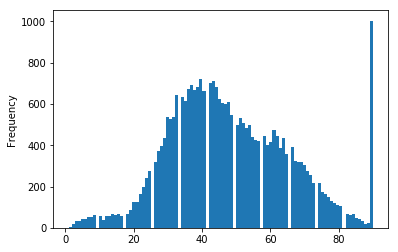

In [166]:
data['age'].plot.hist(bins=100)

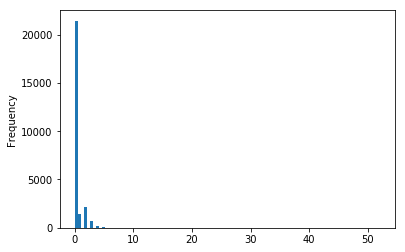

In [167]:
data['dependents'].plot.hist(bins=100)

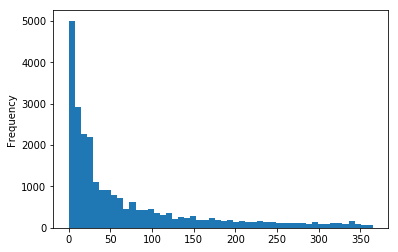

In [168]:
data['days_since_last_transaction'].plot.hist(bins=50)

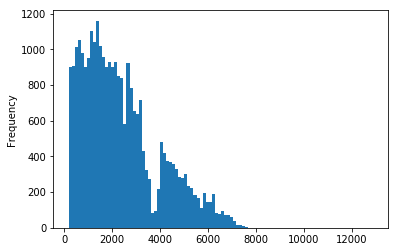

In [169]:
data['vintage'].plot.hist(bins=100)

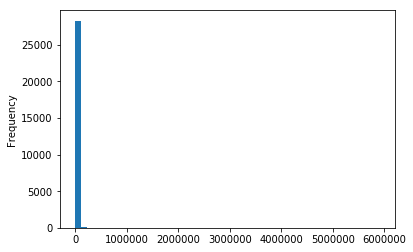

In [170]:
data['current_balance'].plot.hist(bins=50)

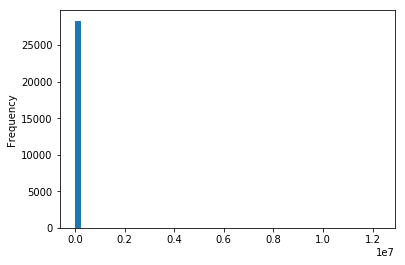

In [171]:
data['current_month_credit'].plot.hist(bins=50)

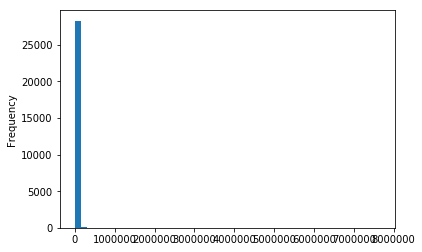

In [172]:
data['current_month_debit'].plot.hist(bins=50)

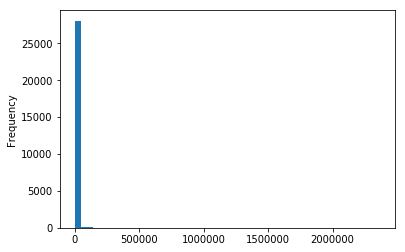

In [173]:
data['previous_month_credit'].plot.hist(bins=50)

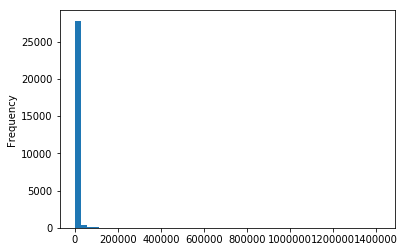

In [174]:
data['previous_month_debit'].plot.hist(bins=50)

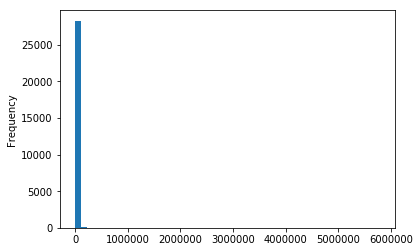

In [175]:
data['current_month_balance'].plot.hist(bins=50)

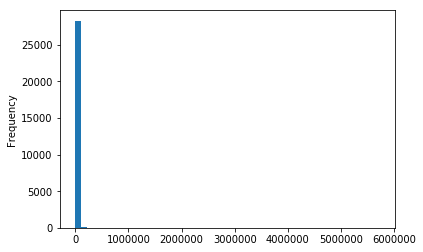

In [176]:
data['previous_month_balance'].plot.hist(bins=50)

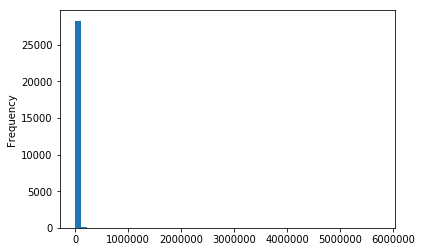

In [177]:
data['previous_month_end_balance'].plot.hist(bins=50)

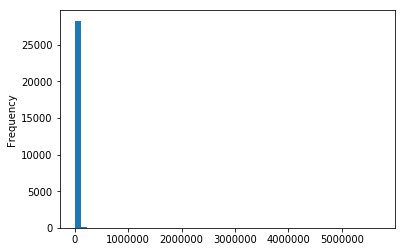

In [178]:
data['average_monthly_balance_prevQ'].plot.hist(bins=50)

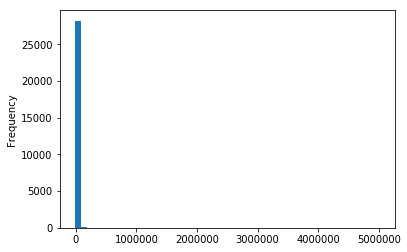

In [179]:
data['average_monthly_balance_prevQ2'].plot.hist(bins=50)

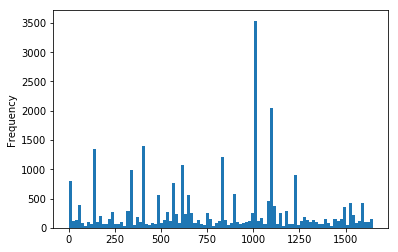

In [180]:
data['city'].plot.hist(bins=100)

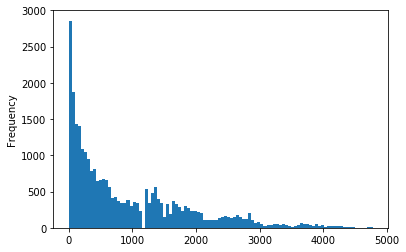

In [181]:
data['branch_code'].plot.hist(bins=100)

# Bivariate Analysis

In [182]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

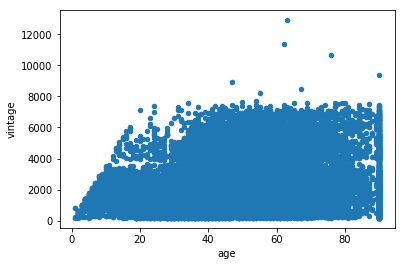

In [183]:
data.plot.scatter('age','vintage')

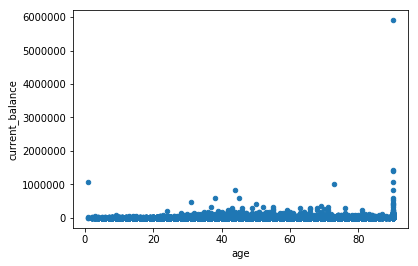

In [184]:
data.plot.scatter('age','current_balance')

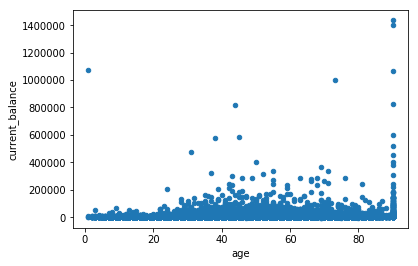

In [185]:
data[data['current_balance']<2000000].plot.scatter('age','current_balance')

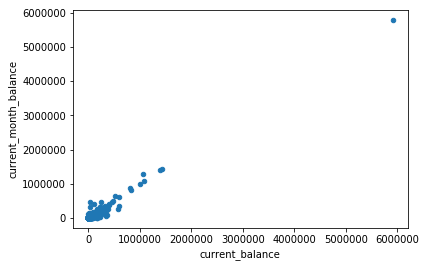

In [186]:
data.plot.scatter('current_balance','current_month_balance')

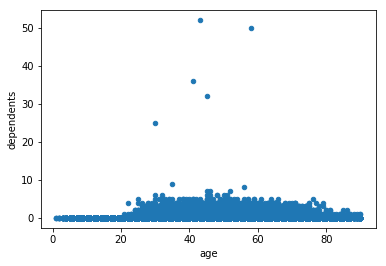

In [187]:
data.plot.scatter('age','dependents')

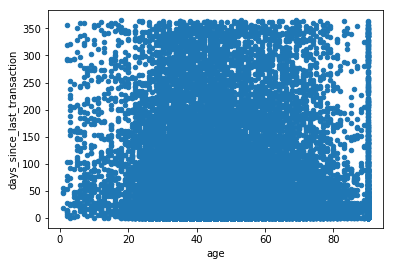

In [188]:
data.plot.scatter('age','days_since_last_transaction')

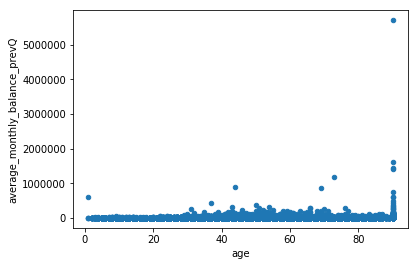

In [189]:
data.plot.scatter('age','average_monthly_balance_prevQ')

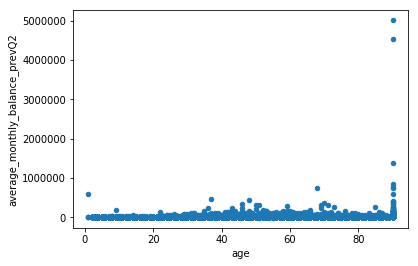

In [190]:
data.plot.scatter('age','average_monthly_balance_prevQ2')

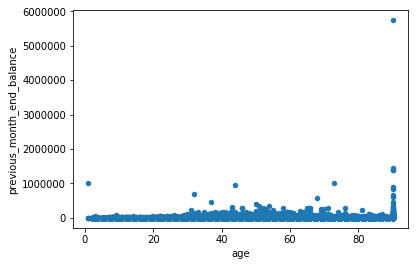

In [191]:
data.plot.scatter('age','previous_month_end_balance')

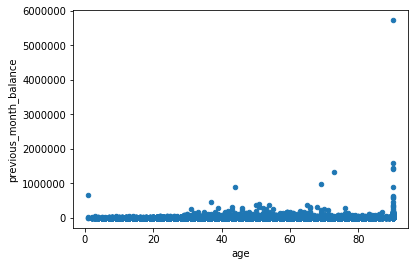

In [192]:
data.plot.scatter('age','previous_month_balance')

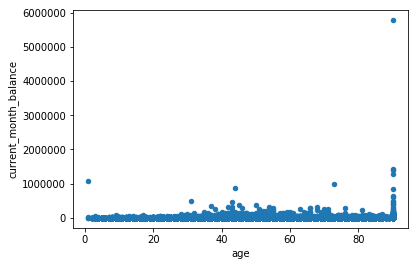

In [193]:
data.plot.scatter('age','current_month_balance')

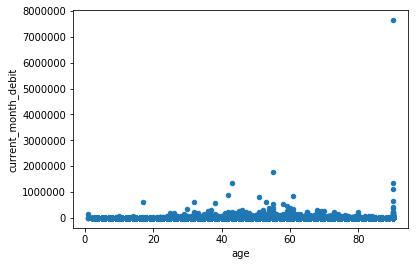

In [194]:
data.plot.scatter('age','current_month_debit')

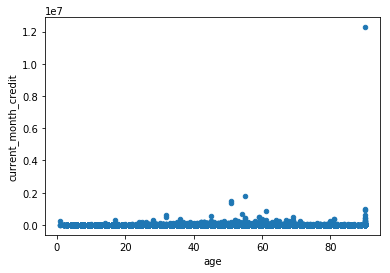

In [195]:
data.plot.scatter('age','current_month_credit')

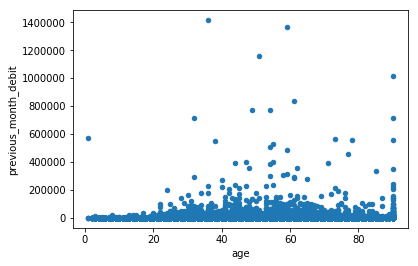

In [196]:
data.plot.scatter('age','previous_month_debit')

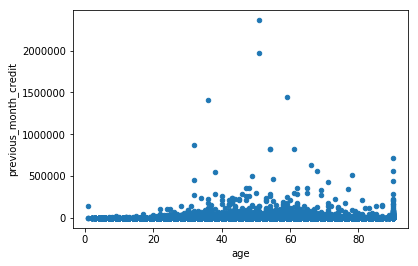

In [197]:
data.plot.scatter('age','previous_month_credit')

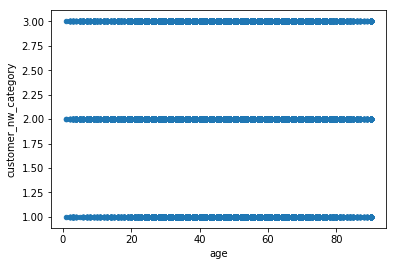

In [198]:
data.plot.scatter('age','customer_nw_category')

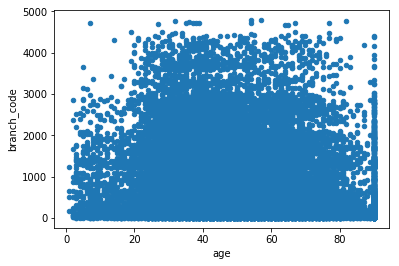

In [199]:
data.plot.scatter('age','branch_code')

In [200]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

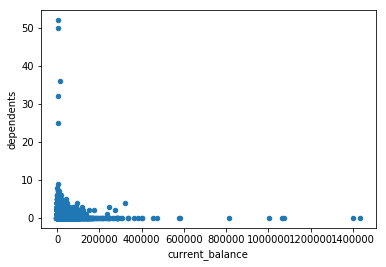

In [201]:
data.plot.scatter('current_balance','dependents')

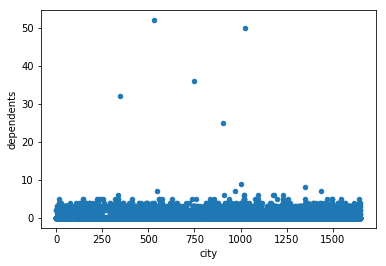

In [202]:
data.plot.scatter('city','dependents')

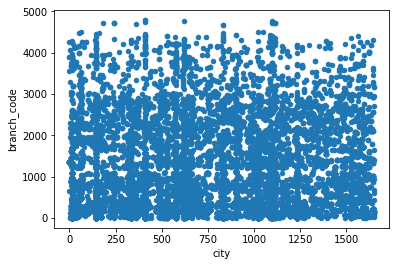

In [203]:
data.plot.scatter('city','branch_code')

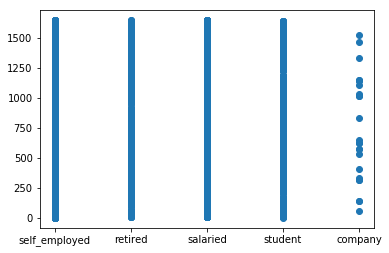

In [204]:
data1 = data.dropna()
plt.scatter(data1['occupation'],data1['city'])

(80, 21)
2
1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
334.0      930
1232.0     840
623.0      778
15.0       669
575.0      631
1525.0     375
905.0      345
491.0      312
1111.0     312
1494.0     289
649.0      281
1589.0     251
318.0      245
1084.0     240
61.0       237
531.0      227
656.0      197
904.0      187
630.0      166
1181.0     150
1271.0     150
1076.0     133
745.0      130
996.0      119
621.0      114
          ... 
1179.0       1
1421.0       1
973.0        1
847.0        1
1001.0       1
1279.0       1
1137.0       1
1245.0       1
1594.0       1
948.0        1
1026.0       1
1166.0       1
1545.0       1
808.0        1
503.0        1
1300.0       1
1605.0       1
824.0        1
607.0        1
1011.0       1
728.0        1
1207.0       1
566.0        1
972.0        1
1448.0       1
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
81,85,1206,65,Male,0.0,NaN,619.0,3,1761,13.0,...,7713.06,5382.72,2313.62,10165.10,15515.99,10075.57,10638.66,4390.67,8821.53,0
331,356,1881,60,Female,0.0,NaN,104.0,3,2158,68.0,...,4067.44,4165.99,2568.53,0.57,0.57,2796.57,0.57,2029.45,4068.37,1
724,774,970,62,Male,0.0,NaN,697.0,3,1812,28.0,...,1624.52,1596.87,1280.69,142.90,142.90,0.04,0.04,1767.37,1610.69,0
997,1064,4163,85,Male,1.0,NaN,299.0,2,373,86.0,...,7515.37,8212.52,10654.11,0.16,0.16,5457.09,1069.30,6071.09,8172.59,0
1052,1125,3165,40,Female,0.0,NaN,146.0,1,1756,NaN,...,1936.05,1895.01,2061.69,0.06,0.06,0.06,0.06,2027.52,1882.25,0
1186,1267,795,90,Male,0.0,NaN,991.0,3,1912,NaN,...,88516.64,88726.49,101320.62,0.16,0.16,0.16,0.16,88516.64,88516.64,0
1221,1303,5527,62,Male,0.0,NaN,15.0,2,6,147.0,...,1804.84,2359.96,3066.43,0.60,0.60,0.60,1429.17,1218.05,2313.50,0
1838,1971,6450,75,Female,NaN,NaN,334.0,1,4,112.0,...,10094.01,9860.48,8074.60,0.59,0.59,0.59,0.59,10685.15,10094.21,0
1893,2028,3339,71,Male,0.0,NaN,NaN,2,1517,45.0,...,4775.60,3041.65,3102.95,0.44,214.73,214.73,0.44,4628.11,4402.60,0
2031,2174,185,90,Male,NaN,NaN,499.0,3,647,0.0,...,2731.71,249546.45,4526049.01,35205.37,80899.25,37177.01,209375.89,8932.18,40335.19,1


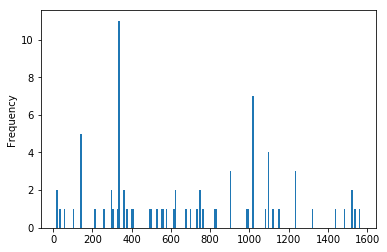

In [205]:
data2 = data[data['occupation'].isnull()]
print(data2.shape)
print(data2['city'].isnull().sum())
print(data['city'].value_counts())
data2['city'].plot.hist(bins=200)
data2

In [206]:
data3 = data[data['city'].isnull()]
print(data3.shape)
print(data3['occupation'].value_counts())
print(data3['occupation'].isnull().sum())
data3

(803, 21)
self_employed    493
salaried         193
retired           59
student           53
company            3
Name: occupation, dtype: int64
2


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
41,44,282,90,NaN,NaN,self_employed,NaN,3,2939,61.0,...,7870.87,7265.10,4324.97,0.23,0.23,0.23,0.23,7870.87,7870.87,0
121,127,2919,66,Male,1.0,retired,NaN,1,16,0.0,...,48883.19,57415.13,16768.78,382.80,5910.64,31358.79,21735.89,27160.15,55694.76,1
131,139,3425,43,Male,2.0,salaried,NaN,3,2245,32.0,...,2189.98,1930.66,4036.99,0.13,8742.99,1105.96,3900.13,1872.19,1716.76,0
234,256,1490,90,Male,0.0,self_employed,NaN,2,2375,21.0,...,751.24,3547.03,1577.53,11748.99,693.26,308.81,1523.54,9824.97,180.84,0
292,315,883,6,Female,0.0,student,NaN,2,32,NaN,...,3056.21,2641.46,1490.73,0.40,0.40,0.40,0.40,3127.64,3056.21,1
306,330,3148,29,Male,0.0,self_employed,NaN,2,37,14.0,...,6040.09,7128.58,7278.22,948.37,826.11,212.95,3096.76,4854.50,7558.51,0
335,360,1921,37,Male,0.0,self_employed,NaN,2,780,3.0,...,9627.31,4343.18,1663.77,3290.30,8008.71,6951.01,1005.61,5555.56,5860.12,1
350,376,353,32,Female,0.0,self_employed,NaN,3,1643,18.0,...,1604.24,1461.62,1498.16,2285.89,0.17,3571.60,0.17,1176.37,1604.24,1
370,397,2169,70,Female,0.0,self_employed,NaN,2,3192,165.0,...,1660.27,1822.80,3236.69,0.30,0.30,0.30,256.50,1660.27,1891.68,0


In [207]:
data[data['occupation'].isnull()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
81,85,1206,65,Male,0.0,NaN,619.0,3,1761,13.0,...,7713.06,5382.72,2313.62,10165.10,15515.99,10075.57,10638.66,4390.67,8821.53,0
331,356,1881,60,Female,0.0,NaN,104.0,3,2158,68.0,...,4067.44,4165.99,2568.53,0.57,0.57,2796.57,0.57,2029.45,4068.37,1
724,774,970,62,Male,0.0,NaN,697.0,3,1812,28.0,...,1624.52,1596.87,1280.69,142.90,142.90,0.04,0.04,1767.37,1610.69,0
997,1064,4163,85,Male,1.0,NaN,299.0,2,373,86.0,...,7515.37,8212.52,10654.11,0.16,0.16,5457.09,1069.30,6071.09,8172.59,0
1052,1125,3165,40,Female,0.0,NaN,146.0,1,1756,NaN,...,1936.05,1895.01,2061.69,0.06,0.06,0.06,0.06,2027.52,1882.25,0
1186,1267,795,90,Male,0.0,NaN,991.0,3,1912,NaN,...,88516.64,88726.49,101320.62,0.16,0.16,0.16,0.16,88516.64,88516.64,0
1221,1303,5527,62,Male,0.0,NaN,15.0,2,6,147.0,...,1804.84,2359.96,3066.43,0.60,0.60,0.60,1429.17,1218.05,2313.50,0
1838,1971,6450,75,Female,NaN,NaN,334.0,1,4,112.0,...,10094.01,9860.48,8074.60,0.59,0.59,0.59,0.59,10685.15,10094.21,0
1893,2028,3339,71,Male,0.0,NaN,NaN,2,1517,45.0,...,4775.60,3041.65,3102.95,0.44,214.73,214.73,0.44,4628.11,4402.60,0
2031,2174,185,90,Male,NaN,NaN,499.0,3,647,0.0,...,2731.71,249546.45,4526049.01,35205.37,80899.25,37177.01,209375.89,8932.18,40335.19,1


In [208]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

# Dealing with Outliers 

### Delete all the identified outliers and lets see the result. 
### The strategy is to find the predict % and change how we treat outliers accordingly
### Skew-ness of data is being explored

4.747508997437283

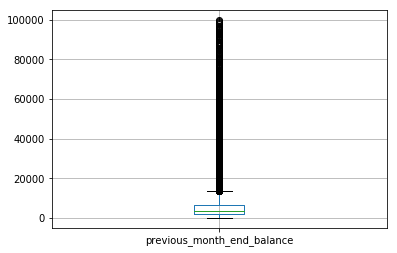

In [209]:
f = 'previous_month_end_balance'
data= data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

4.686681997022146

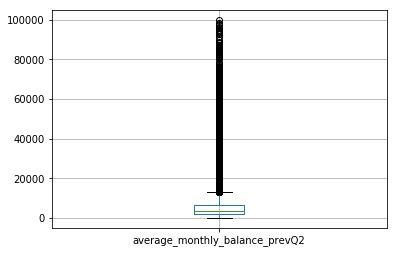

In [210]:
f = 'average_monthly_balance_prevQ2'
data = data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

4.710732942441428

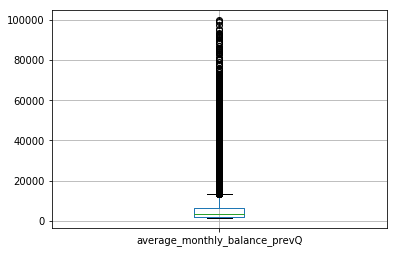

In [211]:
f = 'average_monthly_balance_prevQ'
data = data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

7.32812253015154

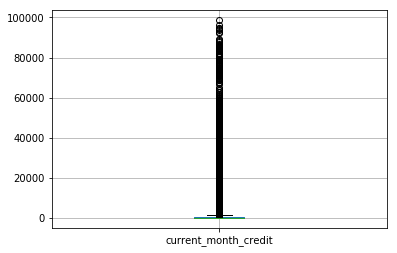

In [212]:
f = 'current_month_credit'
data= data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

7.216647719166356

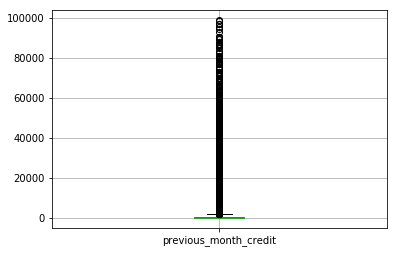

In [213]:
f = 'previous_month_credit'
data= data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

6.55305161657061

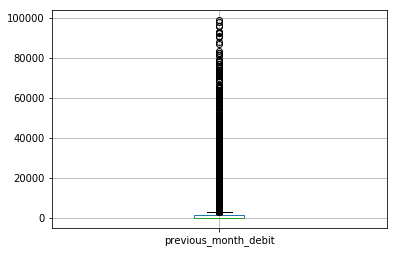

In [214]:
f = 'previous_month_debit'
data= data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

6.928700260545263

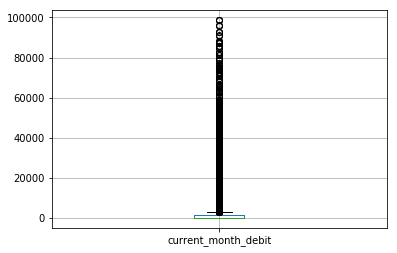

In [215]:
f = 'current_month_debit'
data= data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

4.7039827430015935

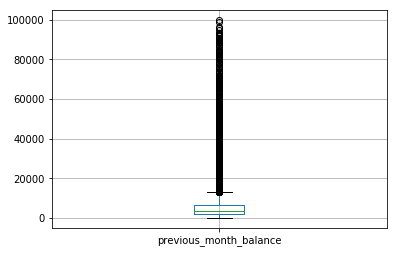

In [216]:
f = 'previous_month_balance'
data= data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

4.529912330058992

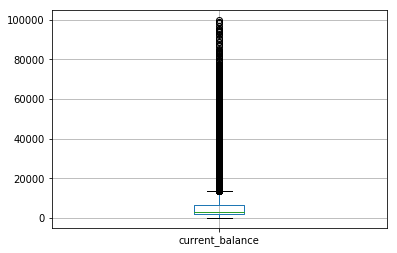

In [217]:
f = 'current_balance'
data= data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

4.643821476891537

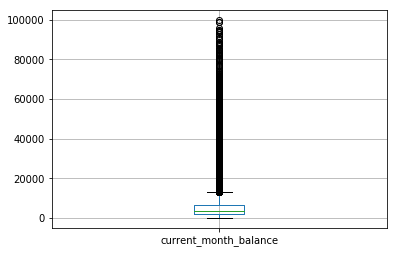

In [218]:
f = 'current_month_balance'
data= data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

In [219]:
data.shape

(27887, 21)

In [220]:
f = 'dependents'
data[data[f]>10]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
3741,3988,293,43,Male,52.0,self_employed,531.0,2,1561,5.0,...,2270.12,1923.59,299.47,286.36,572.07,72.07,47.97,2297.21,2187.11,0
7820,8331,233,41,Male,36.0,salaried,745.0,2,1475,58.0,...,14490.23,13081.65,9164.66,0.10,714.39,0.10,0.10,14550.66,14471.34,0
9082,9688,1412,58,Male,50.0,salaried,1025.0,3,2622,11.0,...,7280.36,5717.36,1260.96,13857.19,0.04,19528.61,0.04,8597.22,7279.26,1
14016,14957,557,30,Male,25.0,self_employed,905.0,2,34,0.0,...,102.01,1526.61,1612.37,13100.21,5949.14,1737.36,3155.14,631.42,442.29,0
23681,25267,191,45,Male,32.0,salaried,345.0,3,2277,62.0,...,1074.70,1455.26,1166.65,0.46,0.46,475.67,488.20,1841.57,1167.09,0


In [221]:
data.loc[data[f]>10,f] = data[f].median()

In [222]:
data.shape

(27887, 21)

# Final Result after Outlier Treatment

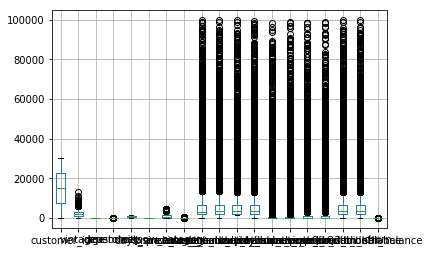

In [223]:
data.boxplot()

In [224]:
#Log transformation of data to reduce the skew-ness of data the follwing columns

feature = ['current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance']

data_money = data[feature]
data_money = np.log(data_money + 17000)

std = StandardScaler()
scaled = std.fit_transform(data_money)

scaled



array([[-0.69069968, -0.71757894, -0.80152612, ..., -0.42823459,
        -0.74328912, -0.76044146],
       [ 0.07243903,  0.61142348,  0.47209797, ..., -0.39969628,
         0.25544861,  0.63300124],
       [-0.19730436,  0.13285245, -0.06216147, ..., -0.35491694,
        -0.01577171, -0.01575063],
       ...,
       [ 5.22727638,  5.06741868,  4.97526451, ..., -0.4078573 ,
         5.22520052,  5.05793565],
       [-0.65513845, -0.68146599, -0.74938516, ..., -0.42823459,
        -0.70605089, -0.72294233],
       [-0.55426742, -0.43172879, -0.40982821, ..., -0.1258858 ,
        -0.53689364, -0.37227542]])

In [225]:
data.drop(labels = feature, axis = 1, inplace=True)
data = data.merge(data_money,left_index=True, right_index= True, how='left',)

In [226]:
data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,churn,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
count,27887.000000,27887.000000,27887.000000,25464.000000,27095.000000,27887.000000,27887.000000,24678.000000,27887.000000,27887.000000,27887.000000,27887.000000,27887.000000,27887.000000,27887.000000,27887.000000,27887.000000,27887.000000,27887.000000
mean,15135.567325,2357.778176,48.037795,0.338164,796.306699,2.234661,929.309535,70.775144,0.181518,9.998057,10.002085,10.009118,9.996022,9.810192,9.814428,9.826878,9.829305,10.002894,10.005760
std,8744.391191,1605.438893,17.741643,0.827242,433.255011,0.656438,939.018645,86.664218,0.385454,0.253031,0.249166,0.231845,0.244565,0.194444,0.199119,0.204078,0.206256,0.241636,0.239955
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,9.740969,9.740972,9.821664,9.740972,9.740969,9.740969,9.740969,9.740969,9.740972,9.740972
25%,7550.500000,1117.000000,35.000000,0.000000,409.000000,2.000000,177.000000,12.000000,0.000000,9.840714,9.847105,9.861000,9.843056,9.740987,9.740987,9.740992,9.740993,9.851380,9.855670
50%,15124.000000,2012.000000,46.000000,0.000000,834.000000,2.000000,578.000000,31.000000,0.000000,9.915775,9.920782,9.927952,9.919873,9.741005,9.741006,9.745765,9.746839,9.923419,9.924740
75%,22700.500000,3169.000000,60.000000,0.000000,1096.000000,3.000000,1443.000000,97.000000,0.000000,10.064560,10.065394,10.063466,10.059637,9.778124,9.782148,9.812835,9.812795,10.064962,10.063945
max,30301.000000,12899.000000,90.000000,9.000000,1649.000000,3.000000,4782.000000,365.000000,1.000000,11.667865,11.667865,11.667865,11.666936,11.657650,11.660844,11.657650,11.660959,11.667865,11.667865


In [227]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'churn', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance'],
      dtype='object')

# Dealing with Missing values

In [228]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             486
dependents                        2423
occupation                          70
city                               792
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3209
churn                                0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
dtype: int64

In [229]:
# gender : try with mode
gender_mode = data['gender'].mode()[0]
print(gender_mode)
data['gender'].fillna(gender_mode,inplace=True)

Male


In [230]:
# days_since_last_transaction : median
median1  = data['days_since_last_transaction'].median()
data['days_since_last_transaction'].fillna(median1,inplace=True)

In [231]:
#dependents with mode(if the accuracy doesent satisfy try other values)
dependents_mode = data['dependents'].mode()[0]
data['dependents'].fillna(dependents_mode,inplace=True)

## To fill the nan values of occupation and city
### 1. first fill the nan occupation with the city wise mode values
### 2. then fill the nan city with with the occupation mode values
### 3. if both city and occupation is nan, fillna with global modes

In [232]:
city_mode = data['city'].mode()[0]
occupation_mode = data['occupation'].mode()[0]
index = data[data['city'].isnull()&data['occupation'].isnull()]
index
index.index

Int64Index([1893, 8966], dtype='int64')

In [233]:

data.loc[index.index,'city'] = city_mode
data.loc[index.index,'occupation'] = occupation_mode

In [234]:
#lets deal with the nan occupation
import numpy as np
dict1 = {}
c=0
list_city_occu_nan = data[data['occupation'].isnull()==True]['city'].values.tolist()
#data[data['city']==57]['occupation'].mode().empty
#print(data[data['city']==749]['occupation'].mode())

for i in list_city_occu_nan:
    mode_occupation_nan = data[data['city']==i]['occupation'].mode()
    if mode_occupation_nan.empty == False:
        #print('\n\n\n',i,"-",mode_occupation_nan[0])
        c =c +1
        dict1[i] = mode_occupation_nan[0]
    else:
        dict1[i] = occupation_mode
#print(c)



pointer = data[data['city']==619]
idex= pointer[pointer['occupation'].isnull()].index


#print(pointer)


for city in dict1:
    occ = dict1[city]
    #print(occ)
    #print(city)
    pointer = data[data['city']==city]
    idex= pointer[pointer['occupation'].isnull()].index
    #print(idex)
    data.loc[idex, 'occupation'] = occ

    
#dict1

In [235]:
#lets deal with the nan city
dict2 = {}
c=0
list_occ_city_nan = data[data['city'].isnull()==True]['occupation'].values.tolist()
#data[data['city']==57]['occupation'].mode().empty
#print(data[data['city']==749]['occupation'].mode())

for i in list_occ_city_nan:
    mode_city_nan = data[data['occupation']==i]['city'].mode()
    if mode_city_nan.empty == False:
        #print('\n\n\n',i,"-",mode_occupation_nan[0])
        #c =c +1
        dict2[i] = mode_city_nan[0]
    else:
        dict2[i] = city_mode
#print(c)

for occ in dict2:
    city = dict2[occ]
    #print(occ)
    #print(city)
    pointer = data[data['occupation']==occ]
    idex= pointer[pointer['city'].isnull()].index
    data.loc[idex,'city'] = city

#dict2

In [236]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
churn                             0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
dtype: int64

In [237]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
churn                               int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

# For Classification we need to drop the unecessary features and change some features:
### Customer id needs to be dropped
### Number encode Gender, Occupation.
### City and Branch Code are categorial Variables. But We will keep them as it is. Since they are already number encoded

In [238]:
data.drop(labels='customer_id',axis = 1,inplace=True)

In [239]:
data['gender']= data['gender'].astype('category')
data.dtypes

vintage                              int64
age                                  int64
gender                            category
dependents                         float64
occupation                          object
city                               float64
customer_nw_category                 int64
branch_code                          int64
days_since_last_transaction        float64
churn                                int64
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
dtype: object

In [240]:
data['gender_cat'] = data['gender'].cat.codes

In [241]:
data

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,churn,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_cat
0,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,0,...,9.823292,9.823292,9.822769,9.740980,9.740980,9.740980,9.740980,9.823292,9.823292,1
1,310,35,Male,0.0,self_employed,1020.0,2,3214,60.0,0,...,10.154428,10.118569,10.289410,9.741002,9.741002,10.020660,9.746866,10.064619,10.157649,1
2,2356,31,Male,0.0,salaried,146.0,2,41,31.0,0,...,10.035186,9.994706,9.894242,9.741005,9.741005,10.045279,9.756102,9.999083,10.001981,1
3,478,90,Male,0.0,self_employed,1020.0,2,582,147.0,1,...,9.867441,9.856634,9.798490,9.740996,9.740996,9.740996,9.859710,9.867441,9.834662,1
4,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,1,...,9.820199,9.833243,9.845388,9.740988,9.782145,9.775007,9.827581,9.806820,9.835057,1
5,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,0,...,10.406059,10.380072,10.335232,9.740990,9.740990,9.790179,9.757656,10.395725,10.384362,0
6,5922,72,Male,0.0,retired,1020.0,1,1,98.0,0,...,10.115133,10.121005,10.248224,9.741006,9.741006,9.814637,9.766479,10.088973,10.116822,1
7,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,0,...,10.147199,10.065259,10.413738,9.740985,9.740985,9.766701,10.029611,10.148934,10.013106,1
8,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,0,...,9.817704,9.836409,9.805110,9.782139,9.748066,9.782139,9.761892,9.808267,9.844662,1
9,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,0,...,9.963848,9.861025,9.845028,10.082148,9.962046,9.846245,9.817322,9.842843,9.873888,1


In [242]:
data['occupation']= data['occupation'].astype('category')
print(data.dtypes)
data['occupation_cat'] = data['occupation'].cat.codes
data

vintage                              int64
age                                  int64
gender                            category
dependents                         float64
occupation                        category
city                               float64
customer_nw_category                 int64
branch_code                          int64
days_since_last_transaction        float64
churn                                int64
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
gender_cat                            int8
dtype: object


,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,churn,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_cat,occupation_cat
0,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,0,...,9.823292,9.822769,9.740980,9.740980,9.740980,9.740980,9.823292,9.823292,1,3
1,310,35,Male,0.0,self_employed,1020.0,2,3214,60.0,0,...,10.118569,10.289410,9.741002,9.741002,10.020660,9.746866,10.064619,10.157649,1,3
2,2356,31,Male,0.0,salaried,146.0,2,41,31.0,0,...,9.994706,9.894242,9.741005,9.741005,10.045279,9.756102,9.999083,10.001981,1,2
3,478,90,Male,0.0,self_employed,1020.0,2,582,147.0,1,...,9.856634,9.798490,9.740996,9.740996,9.740996,9.859710,9.867441,9.834662,1,3
4,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,1,...,9.833243,9.845388,9.740988,9.782145,9.775007,9.827581,9.806820,9.835057,1,3
5,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,0,...,10.380072,10.335232,9.740990,9.740990,9.790179,9.757656,10.395725,10.384362,0,3
6,5922,72,Male,0.0,retired,1020.0,1,1,98.0,0,...,10.121005,10.248224,9.741006,9.741006,9.814637,9.766479,10.088973,10.116822,1,1
7,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,0,...,10.065259,10.413738,9.740985,9.740985,9.766701,10.029611,10.148934,10.013106,1,3
8,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,0,...,9.836409,9.805110,9.782139,9.748066,9.782139,9.761892,9.808267,9.844662,1,2
9,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,0,...,9.861025,9.845028,10.082148,9.962046,9.846245,9.817322,9.842843,9.873888,1,3


In [243]:
data['occupation_cat'].value_counts()

3    17203
2     6597
4     2053
1     1995
0       39
Name: occupation_cat, dtype: int64

In [244]:
data['branch_code']= data['branch_code'].astype('category')
print(data.dtypes)
data['branch_code_cat'] = data['branch_code'].cat.codes
data

vintage                              int64
age                                  int64
gender                            category
dependents                         float64
occupation                        category
city                               float64
customer_nw_category                 int64
branch_code                       category
days_since_last_transaction        float64
churn                                int64
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
gender_cat                            int8
occupation_cat                        int8
dtype: object


,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,churn,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_cat,occupation_cat,branch_code_cat
0,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,0,...,9.822769,9.740980,9.740980,9.740980,9.740980,9.823292,9.823292,1,3,676
1,310,35,Male,0.0,self_employed,1020.0,2,3214,60.0,0,...,10.289410,9.741002,9.741002,10.020660,9.746866,10.064619,10.157649,1,3,2680
2,2356,31,Male,0.0,salaried,146.0,2,41,31.0,0,...,9.894242,9.741005,9.741005,10.045279,9.756102,9.999083,10.001981,1,2,40
3,478,90,Male,0.0,self_employed,1020.0,2,582,147.0,1,...,9.798490,9.740996,9.740996,9.740996,9.859710,9.867441,9.834662,1,3,530
4,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,1,...,9.845388,9.740988,9.782145,9.775007,9.827581,9.806820,9.835057,1,3,364
5,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,0,...,10.335232,9.740990,9.740990,9.790179,9.757656,10.395725,10.384362,0,3,1427
6,5922,72,Male,0.0,retired,1020.0,1,1,98.0,0,...,10.248224,9.741006,9.741006,9.814637,9.766479,10.088973,10.116822,1,1,0
7,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,0,...,10.413738,9.740985,9.740985,9.766701,10.029611,10.148934,10.013106,1,3,294
8,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,0,...,9.805110,9.782139,9.748066,9.782139,9.761892,9.808267,9.844662,1,2,3063
9,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,0,...,9.845028,10.082148,9.962046,9.846245,9.817322,9.842843,9.873888,1,3,37


In [245]:
data.drop(labels='branch_code',axis=1,inplace=True)

In [246]:
data['branch_code_cat'].value_counts()

18      141
5       135
59      117
7       107
15      103
87      103
26       93
83       92
14       91
32       90
46       90
53       89
75       89
12       89
2        88
132      87
468      86
0        84
88       81
4        81
102      80
6        80
51       77
43       74
146      72
1        72
497      71
25       71
79       70
194      65
       ... 
2952      1
2835      1
2984      1
2819      1
3016      1
3032      1
2787      1
2632      1
2616      1
3011      1
3155      1
1720      1
1314      1
1736      1
1864      1
1928      1
1944      1
2168      1
2184      1
3123      1
2600      1
3107      1
3091      1
2488      1
3075      1
3059      1
2552      1
3043      1
2584      1
2047      1
Name: branch_code_cat, Length: 3180, dtype: int64

In [247]:
data.drop(labels='occupation',axis=1,inplace=True)

In [248]:
data.drop(labels='gender',axis=1,inplace=True)

In [249]:
data

,vintage,age,dependents,city,customer_nw_category,days_since_last_transaction,churn,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_cat,occupation_cat,branch_code_cat
0,3135,66,0.0,187.0,2,224.0,0,9.823292,9.823292,9.823292,9.822769,9.740980,9.740980,9.740980,9.740980,9.823292,9.823292,1,3,676
1,310,35,0.0,1020.0,2,60.0,0,10.016386,10.154428,10.118569,10.289410,9.741002,9.741002,10.020660,9.746866,10.064619,10.157649,1,3,2680
2,2356,31,0.0,146.0,2,31.0,0,9.948134,10.035186,9.994706,9.894242,9.741005,9.741005,10.045279,9.756102,9.999083,10.001981,1,2,40
3,478,90,0.0,1020.0,2,147.0,1,9.867441,9.867441,9.856634,9.798490,9.740996,9.740996,9.740996,9.859710,9.867441,9.834662,1,3,530
4,2531,42,2.0,1494.0,3,58.0,1,9.794103,9.820199,9.833243,9.845388,9.740988,9.782145,9.775007,9.827581,9.806820,9.835057,1,3,364
5,263,42,0.0,1096.0,2,60.0,0,10.379790,10.406059,10.380072,10.335232,9.740990,9.740990,9.790179,9.757656,10.395725,10.384362,0,3,1427
6,5922,72,0.0,1020.0,1,98.0,0,10.086098,10.115133,10.121005,10.248224,9.741006,9.741006,9.814637,9.766479,10.088973,10.116822,1,1,0
7,1145,46,0.0,623.0,2,172.0,0,10.207163,10.147199,10.065259,10.413738,9.740985,9.740985,9.766701,10.029611,10.148934,10.013106,1,3,294
8,2132,31,0.0,1096.0,2,19.0,0,9.817704,9.817704,9.836409,9.805110,9.782139,9.748066,9.782139,9.761892,9.808267,9.844662,1,2,3063
9,3379,40,3.0,1020.0,2,0.0,0,9.996885,9.963848,9.861025,9.845028,10.082148,9.962046,9.846245,9.817322,9.842843,9.873888,1,3,37


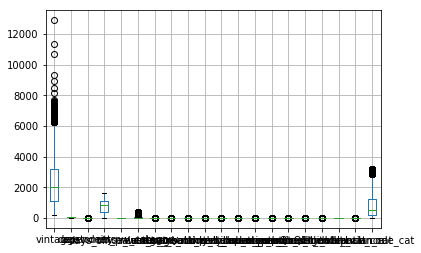

In [250]:
data.boxplot()

In [251]:
data.dtypes

vintage                             int64
age                                 int64
dependents                        float64
city                              float64
customer_nw_category                int64
days_since_last_transaction       float64
churn                               int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
gender_cat                           int8
occupation_cat                       int8
branch_code_cat                     int16
dtype: object

In [252]:
#saving the cleaned data in a csv file. This will be used in model training and model evaluation phase 
data.to_csv("data_cleaned_churn.csv")